
Taller 2: Uso de Algoritmos de ML

Nombre: Hanna Caroline Villamil Ortiz

Cedula: **1016085540**

1.
 *   Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia

*   Realice las tareas de limpieza necesarias
*   Dividir el conjunto entre datos de entrenamiento y datos de prueba, los datos de prueba serán el 15% del dataset
*   Aplicar el algoritmo de clasificación de los K vecinos más cercanos
*   Calcular los puntajes de la clasificación
*   Concluir si la clasificación fue buena o no

**Sobre este archivo**

*El archivo consta de 1200 registros de dolencias cardíacas, cada 300 registros pertenece a una clase de dolencia y 56 columnas, la Columna 1 da número de registros, La columna 56 da la clase del registro como ARR - Arritmia, AFF- Fibrilación auricular, CHF- Insuficiencia cardíaca congestiva y NSR- Ritmo sinusal normal que se ocupa del problema de clasificación de multiclase. Las 54 columnas restantes son características extraídas utilizando el método MODWPT. Las señales originales se toman de la base de datos de physionet MIT-BIH y se procesan.*

Tomado de:
*https://www.kaggle.com/datasets/akki2703/ecg-of-cardiac-ailments-dataset?select=ECGCvdata.csv*


In [1]:


import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#Importar dataset como un DataFrame
corazon_df = pd.read_csv("ECGCvdata.csv", delimiter=",")


In [2]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar la columna categórica en numérica
corazon_df['ECG_signal'] = label_encoder.fit_transform(corazon_df['ECG_signal'])


In [3]:
#Se almacenan los datos de entrada y de salida
corazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RECORD      1200 non-null   int64  
 1   hbpermin    1200 non-null   float64
 2   Pseg        1200 non-null   float64
 3   PQseg       1200 non-null   float64
 4   QRSseg      1200 non-null   float64
 5   QRseg       1200 non-null   float64
 6   QTseg       1200 non-null   float64
 7   RSseg       1200 non-null   float64
 8   STseg       1200 non-null   float64
 9   Tseg        1200 non-null   float64
 10  PTseg       1200 non-null   float64
 11  ECGseg      1200 non-null   float64
 12  QRtoQSdur   431 non-null    float64
 13  RStoQSdur   431 non-null    float64
 14  RRmean      1200 non-null   float64
 15  PPmean      1200 non-null   float64
 16  PQdis       1200 non-null   float64
 17  PonQdis     1200 non-null   float64
 18  PRdis       1200 non-null   float64
 19  PonRdis     1200 non-null  

In [4]:
#se visualizan todas las columanas de un Data Frame
pd.options.display.max_columns = None

In [5]:
corazon_df.head(20)
#Mostrar los primeros 10 registros del DataFrame

,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,PTseg,ECGseg,QRtoQSdur,RStoQSdur,RRmean,PPmean,PQdis,PonQdis,PRdis,PonRdis,PSdis,PonSdis,PTdis,PonTdis,PToffdis,QRdis,QSdis,QTdis,QToffdis,RSdis,RTdis,RToffdis,STdis,SToffdis,PonToffdis,PonPQang,PQRang,QRSang,RSTang,STToffang,RRTot,NNTot,SDRR,IBIM,IBISD,SDSD,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
0,1,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,0.301905,0.426111,0.001371,0.001406,291.794118,291.735294,39.151151,55.148893,54.827069,70.827385,70.913729,86.912740,108.647070,124.647077,137.911820,15.721401,31.764732,69.501920,98.765699,16.129107,53.827711,83.091597,37.738343,67.001231,153.911765,1.245455,-5.127081,8.356354,-4.774444,0.870490,35,34,17.132321,291.794118,17.389965,27.158481,292.296636,18.457618,63.615239,-0.014364,0.075270,-0.070846,0.012606,2,5.882353,1
1,2,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,0.289670,0.366667,0.001368,0.001409,318.387097,318.322581,34.588437,46.487006,51.262389,63.167131,68.422595,80.323968,104.225842,116.129083,119.935662,16.736067,33.838787,69.648183,85.356467,17.212920,52.973059,68.682955,35.811162,51.518178,131.838710,2.151593,-6.003337,9.217430,-5.355692,1.370320,32,31,10.612462,318.387097,10.787886,9.665517,318.563915,23.043230,67.787773,-0.021207,0.083773,-0.077458,0.016175,1,3.225806,1
2,3,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,0.219088,0.293234,NaN,NaN,259.763158,259.526316,31.266226,42.537823,38.131268,49.406028,45.867323,57.141210,79.238234,90.526725,94.765239,6.896067,14.606442,48.013021,63.531840,7.751319,41.142777,56.664243,33.408047,48.926073,106.052868,NaN,NaN,NaN,NaN,2.999565,39,38,84.512981,259.763158,85.647434,111.816694,273.165412,10.756353,29.253827,-0.042542,NaN,NaN,0.027131,16,42.105263,1
3,4,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,0.296962,0.373177,0.001390,0.001388,312.838710,312.838710,38.941666,54.777178,55.231585,71.070510,71.486752,87.324123,106.903236,122.741968,118.451693,16.358555,32.548432,67.970906,79.518074,16.321751,51.684188,63.232731,35.424510,46.970449,134.290324,NaN,-6.253180,10.293861,-6.035961,1.462617,32,31,11.416165,312.838710,11.604875,11.193252,313.046941,23.845086,65.228737,-0.017806,0.091591,-0.088559,0.017022,2,6.451613,1
4,5,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,0.296345,0.375073,0.001359,0.001419,260.783784,260.864865,37.005130,49.974799,54.786419,67.760629,73.381032,86.352452,106.756792,119.729781,122.189359,17.821022,36.378386,69.758819,85.190191,18.630945,51.976614,67.409454,33.382822,48.812632,135.162163,1.791385,-4.646931,7.254628,-4.489193,1.382357,38,37,35.771146,260.783784,36.264564,60.245998,263.225676,20.942791,72.830353,-0.016650,0.064547,-0.062246,0.016191,2,5.405405,1
5,6,66.960000,0.070251,0.061918,0.090950,0.045968,0.191219,0.044982,0.100269,0.097133,0.253136,0.330287,0.001404,0.001374,313.933333,313.933333,22.279482,37.639157,38.840477,54.207101,55.037411,70.402144,91.133353,106.500046,103.533459,16.634063,32.766781,68.870193,81.268810,16.261555,52.306081,64.706317,36.105263,48.502671,118.900017,NaN,-7.104194,10.136861,-5.957746,1.470472,31,30,39.668571,313.933333,40.346716,13.811712,316.429666,23.787129,65.662400,-0.034030,0.090222,-0.087168,0.017038,3,10.000000,1
6,7,69.120000,0.085243,0.098611,0.113368,0.055035,0.197569,0.058333,0.084201,0.100087,0.296181,0.412153,0.001348,0.001430,306.741935,306.741935,35.490810,50.067870,55.294027,69.875237,76.292375,90.871984,106.613076,121.193971,133.516231,19.851293,40.806918,71.134476,98.033722,21.034138,51.324616,78.229928,30.331964,57.227281,148.096781,NaN,-4.974295,7.059589,-4.611274,2.132554,32,31,8.594701,306.741935,8.736772,8.608846,306.862321,25.674776,81.692349,-0.019779,0.067144,-0.056236,0.024316,2,6.451613,1
7,8,59.940535,0.070040,0.056448,0.003373,0.001687,0.101687,0.0016

In [6]:
print(corazon_df.head(10))

   RECORD   hbpermin      Pseg     PQseg    QRSseg     QRseg     QTseg  \
0       1  74.925669  0.076508  0.108889  0.088254  0.043571  0.193016   
1       2  68.503469  0.072483  0.096181  0.093924  0.046267  0.193490   
2       3  83.488603  0.071154  0.086610  0.039530  0.018590  0.132479   
3       4  68.503469  0.082812  0.108160  0.090365  0.045226  0.188802   
4       5  82.080000  0.070760  0.102632  0.101023  0.049415  0.193713   
5       6  66.960000  0.070251  0.061918  0.090950  0.045968  0.191219   
6       7  69.120000  0.085243  0.098611  0.113368  0.055035  0.197569   
7       8  59.940535  0.070040  0.056448  0.003373  0.001687  0.101687   
8       9  94.192270  0.055492  0.093056  0.111237  0.055366  0.179861   
9      10  68.776119  0.046007  0.086111  0.112760  0.065278  0.166059   

      RSseg     STseg      Tseg     PTseg    ECGseg  QRtoQSdur  RStoQSdur  \
0  0.044683  0.104762  0.130476  0.301905  0.426111   0.001371   0.001406   
1  0.047656  0.099566  0.089149

In [7]:
##Limpieza de datos
##Eliminacion de la columna Education

corazon_df = corazon_df.drop('RECORD',axis=1)
corazon_df = corazon_df.drop('QRtoQSdur',axis=1)
corazon_df = corazon_df.drop('RStoQSdur',axis=1)
corazon_df = corazon_df.drop('RSslope',axis=1)
corazon_df = corazon_df.drop('QRslope',axis=1)
corazon_df = corazon_df.drop('STToffang',axis=1)
corazon_df = corazon_df.drop('RSTang',axis=1)
corazon_df = corazon_df.drop('QRSang',axis=1)
corazon_df = corazon_df.drop('PQRang',axis=1)
corazon_df = corazon_df.drop('PonPQang',axis=1)
corazon_df = corazon_df.drop('NN50',axis=1)
corazon_df = corazon_df.drop('pNN50',axis=1)
corazon_df = corazon_df.drop('RRmean',axis=1)
corazon_df = corazon_df.drop('PPmean',axis=1)
corazon_df = corazon_df.drop('RRTot',axis=1)
corazon_df = corazon_df.drop('NNTot',axis=1)
corazon_df = corazon_df.drop('QRSarea',axis=1)
corazon_df = corazon_df.drop('QRSperi',axis=1)
corazon_df = corazon_df.drop('RMSSD',axis=1)
corazon_df = corazon_df.drop('SDSD',axis=1)
corazon_df = corazon_df.drop('IBISD',axis=1)
corazon_df = corazon_df.drop('IBIM',axis=1)
corazon_df = corazon_df.drop('SDRR',axis=1)
corazon_df = corazon_df.drop('RToffdis',axis=1)
corazon_df = corazon_df.drop('SToffdis',axis=1)
corazon_df = corazon_df.drop('PonToffdis',axis=1)



In [8]:
corazon_df.describe()

,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,PTseg,ECGseg,PQdis,PonQdis,PRdis,PonRdis,PSdis,PonSdis,PTdis,PonTdis,PToffdis,QRdis,QSdis,QTdis,QToffdis,RSdis,RTdis,STdis,PQslope,STslope,ECG_signal
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.0000
mean,81.893980,0.060902,0.078099,0.048238,0.024437,0.141541,0.023800,0.093303,0.102714,0.219640,0.297161,19.207940,26.738118,25.230144,32.764054,31.117082,38.649059,54.296841,61.854528,66.109925,6.066919,11.912438,35.141710,46.950683,5.936489,29.119793,23.236050,-0.071647,0.041659,1.5000
std,19.324351,0.009453,0.019897,0.034649,0.017501,0.029225,0.017175,0.013332,0.022594,0.046359,0.054820,9.489386,12.451664,15.102235,17.676385,20.984496,23.319734,25.637439,28.449516,30.264493,6.352063,12.512768,16.809520,21.757892,6.216819,12.001314,9.214801,0.049705,0.026456,1.1185
min,12.857143,0.021556,0.044526,0.000000,0.000000,0.098761,0.000000,0.052338,0.034936,0.150000,0.189943,6.157060,8.062650,7.079491,8.195826,7.079491,8.195826,19.007673,20.469708,19.398979,0.000000,0.000000,12.083644,12.522494,0.000000,12.010695,6.332043,-0.219938,0.008183,0.0000
25%,67.563000,0.053943,0.060344,0.015101,0.007804,0.116016,0.007143,0.089423,0.090046,0.177343,0.252667,13.072507,17.826913,13.329788,21.255967,13.526573,22.296264,38.003825,42.504173,42.336300,0.060190,0.062093,24.978347,28.784415,0.000000,23.506483,13.851301,-0.106660,0.023853,0.7500
50%,79.872000,0.060642,0.075184,0.044692,0.022676,0.137019,0.021965,0.097825,0.099210,0.215223,0.294843,14.803141,23.401919,18.671241,24.575845,23.197673,29.065394,43.734389,51.009937,61.911917,5.066716,9.887216,28.802629,44.823528,5.050078,26.149959,25.014005,-0.058518,0.034460,1.5000
75%,96.000000,0.066849,0.095190,0.083032,0.041915,0.166314,0.041097,0.101200,0.112408,0.260269,0.341086,25.671599,34.703706,37.215199,45.152225,47.679996,56.218809,70.973844,79.368455,85.754893,11.675602,23.023921,46.556688,59.034722,11.476472,36.568100,27.500495,-0.027685,0.049778,2.2500
max,160.500000,0.095317,0.145577,0.120160,0.065278,0.211111,0.058333,0.138444,0.198413,0.347324,0.456507,48.501598,62.871093,65.378304,79.005065,82.502905,94.871771,118.454548,132.782659,137.969747,23.993625,43.247053,75.992131,103.157403,21.062875,54.006212,50.505006,-0.005427,0.164633,3.0000


In [9]:
corazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hbpermin    1200 non-null   float64
 1   Pseg        1200 non-null   float64
 2   PQseg       1200 non-null   float64
 3   QRSseg      1200 non-null   float64
 4   QRseg       1200 non-null   float64
 5   QTseg       1200 non-null   float64
 6   RSseg       1200 non-null   float64
 7   STseg       1200 non-null   float64
 8   Tseg        1200 non-null   float64
 9   PTseg       1200 non-null   float64
 10  ECGseg      1200 non-null   float64
 11  PQdis       1200 non-null   float64
 12  PonQdis     1200 non-null   float64
 13  PRdis       1200 non-null   float64
 14  PonRdis     1200 non-null   float64
 15  PSdis       1200 non-null   float64
 16  PonSdis     1200 non-null   float64
 17  PTdis       1200 non-null   float64
 18  PonTdis     1200 non-null   float64
 19  PToffdis    1200 non-null  

In [10]:
#Se trabaja con una copia del Dataframe
cora2_df=corazon_df.copy()

In [11]:
#Eliminar nulos
cora2_df= cora2_df.dropna(axis=0,how="any")

In [12]:
cora2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hbpermin    1200 non-null   float64
 1   Pseg        1200 non-null   float64
 2   PQseg       1200 non-null   float64
 3   QRSseg      1200 non-null   float64
 4   QRseg       1200 non-null   float64
 5   QTseg       1200 non-null   float64
 6   RSseg       1200 non-null   float64
 7   STseg       1200 non-null   float64
 8   Tseg        1200 non-null   float64
 9   PTseg       1200 non-null   float64
 10  ECGseg      1200 non-null   float64
 11  PQdis       1200 non-null   float64
 12  PonQdis     1200 non-null   float64
 13  PRdis       1200 non-null   float64
 14  PonRdis     1200 non-null   float64
 15  PSdis       1200 non-null   float64
 16  PonSdis     1200 non-null   float64
 17  PTdis       1200 non-null   float64
 18  PonTdis     1200 non-null   float64
 19  PToffdis    1200 non-null  

1. Guardar la salida en un arreglo

2. Guardar las variables predictoras (datos de entrada) en una matriz

## **Pasar a numerico**

In [13]:
# Se transforman los datos de salida de la clasificación en un arreglo de numpy
salida=cora2_df['ECG_signal']

salidas = pd.to_numeric(cora2_df['ECG_signal'],errors='coerce')

#print(salida)
y=np.array(salida)
print(y)

[1 1 1 ... 3 3 3]


In [14]:
# Se transforman los datos de entrada en un arreglo de numpy
#Se crean arreglos de numpy

#print(cora2_df.columns)

#lista de los nombres de las columnas del dataframe
listNom = cora2_df.columns.tolist()

print(listNom)
#Quitar el primer elemento de la lista (la salida, el diagnostico)
listNom.pop(29)
print(listNom)

#constuir lista de los arreglos de los atributos(columnas)
listx=[]
for column in listNom:
  x=np.array(cora2_df[column])
  listx.append(x)



['hbpermin', 'Pseg', 'PQseg', 'QRSseg', 'QRseg', 'QTseg', 'RSseg', 'STseg', 'Tseg', 'PTseg', 'ECGseg', 'PQdis', 'PonQdis', 'PRdis', 'PonRdis', 'PSdis', 'PonSdis', 'PTdis', 'PonTdis', 'PToffdis', 'QRdis', 'QSdis', 'QTdis', 'QToffdis', 'RSdis', 'RTdis', 'STdis', 'PQslope', 'STslope', 'ECG_signal']
['hbpermin', 'Pseg', 'PQseg', 'QRSseg', 'QRseg', 'QTseg', 'RSseg', 'STseg', 'Tseg', 'PTseg', 'ECGseg', 'PQdis', 'PonQdis', 'PRdis', 'PonRdis', 'PSdis', 'PonSdis', 'PTdis', 'PonTdis', 'PToffdis', 'QRdis', 'QSdis', 'QTdis', 'QToffdis', 'RSdis', 'RTdis', 'STdis', 'PQslope', 'STslope']


In [15]:
#Cantidad de registros
print(len(listx[0]))

1200


In [16]:
#Matrix datos entrada
Salida=[]
for i in range(len(listx[0])):
  aux=[]
  for j in range(len(listNom)):
    aux.append(listx[j][i])
  Salida.append(aux)
X=np.array(Salida)

In [17]:
print(X)

[[ 7.49256690e+01  7.65079365e-02  1.08888889e-01 ...  3.77383430e+01
  -1.43636322e-02  1.26064214e-02]
 [ 6.85034688e+01  7.24826389e-02  9.61805556e-02 ...  3.58111616e+01
  -2.12074267e-02  1.61751716e-02]
 [ 8.34886026e+01  7.11538462e-02  8.66096866e-02 ...  3.34080473e+01
  -4.25419383e-02  2.71314445e-02]
 ...
 [ 9.33227092e+01  5.89272104e-02  1.09136814e-01 ...  1.14511690e+01
  -4.52707678e-02  6.43176055e-02]
 [ 6.37440000e+01  6.14996189e-02  1.01276677e-01 ...  6.44333258e+00
  -5.26260258e-02  1.13422412e-01]
 [ 7.06560000e+01  6.30716463e-02  1.05421113e-01 ...  1.25309192e+01
  -5.18591333e-02  4.80228946e-02]]


In [18]:
#Armamos el modelo. De clasificación o de agrupamiento
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=123,stratify=y)

print(X_test)
print(y_test)

[[ 6.60000000e+01  4.76923077e-02  7.49230769e-02 ...  2.51466935e+01
  -4.81309041e-02  2.38097264e-02]
 [ 6.69642857e+01  7.09135802e-02  7.55555556e-02 ...  2.50217023e+01
  -1.11443104e-01  4.13441780e-02]
 [ 8.85000000e+01  5.30467290e-02  9.45794393e-02 ...  1.70335537e+01
  -2.79747144e-02  4.43359227e-02]
 ...
 [ 6.26400000e+01  6.21647510e-02  5.00000000e-02 ...  3.60114094e+01
  -8.01943274e-02  2.51290017e-02]
 [ 1.01190476e+02  6.54953271e-02  5.52523364e-02 ...  2.50165996e+01
  -1.12696502e-01  3.64234900e-02]
 [ 6.30000000e+01  6.24888889e-02  7.31555556e-02 ...  2.57432035e+01
  -9.49623925e-02  2.98138868e-02]]
[0 2 0 1 1 0 0 3 3 1 0 0 2 1 3 2 3 3 2 0 1 3 3 2 3 2 3 1 2 3 0 3 1 1 1 2 1
 2 0 2 0 2 0 1 1 0 2 1 3 2 3 2 0 1 1 1 0 3 0 1 0 0 3 1 2 1 2 1 0 2 3 2 3 1
 0 0 3 1 2 3 0 1 1 1 0 0 0 2 1 3 2 1 2 2 3 1 2 1 3 1 2 0 2 3 0 2 1 1 0 2 3
 3 2 3 0 2 1 1 0 3 2 2 0 1 1 2 3 2 0 2 1 1 0 2 0 2 0 0 0 3 1 3 2 2 0 2 3 0
 3 0 1 0 3 3 2 3 2 3 2 2 1 3 3 3 1 0 3 3 2 3 0 3 3 1 1 0 3 1 0 0

In [19]:
#Crear mnodelo de k vecinos
#Modelo de clasificación
Knn=KNeighborsClassifier(n_neighbors=3)
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
#Revisar la metrica
Knn.score(X_test,y_test)

0.9722222222222222

In [21]:
predicTest=Knn.predict(X_test)

In [22]:
print(predicTest.tolist())
print(y_test.tolist())

[0, 2, 0, 1, 1, 0, 0, 3, 3, 1, 0, 0, 2, 1, 3, 2, 3, 3, 2, 0, 1, 3, 3, 2, 3, 2, 3, 1, 2, 3, 0, 3, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2, 1, 3, 2, 3, 2, 0, 1, 1, 1, 0, 3, 0, 1, 0, 0, 3, 1, 2, 0, 2, 1, 0, 2, 3, 2, 3, 1, 0, 0, 3, 1, 2, 3, 0, 1, 1, 1, 0, 0, 0, 0, 1, 3, 2, 1, 2, 2, 3, 1, 2, 1, 3, 1, 2, 2, 2, 3, 0, 2, 1, 1, 0, 2, 3, 3, 2, 3, 0, 2, 1, 1, 0, 3, 2, 2, 0, 1, 1, 2, 3, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 3, 1, 3, 2, 2, 0, 2, 3, 0, 3, 0, 1, 0, 3, 3, 2, 3, 2, 3, 2, 2, 1, 3, 3, 3, 1, 0, 3, 3, 2, 3, 0, 3, 3, 1, 0, 2, 3, 1, 0, 0]
[0, 2, 0, 1, 1, 0, 0, 3, 3, 1, 0, 0, 2, 1, 3, 2, 3, 3, 2, 0, 1, 3, 3, 2, 3, 2, 3, 1, 2, 3, 0, 3, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2, 1, 3, 2, 3, 2, 0, 1, 1, 1, 0, 3, 0, 1, 0, 0, 3, 1, 2, 1, 2, 1, 0, 2, 3, 2, 3, 1, 0, 0, 3, 1, 2, 3, 0, 1, 1, 1, 0, 0, 0, 2, 1, 3, 2, 1, 2, 2, 3, 1, 2, 1, 3, 1, 2, 0, 2, 3, 0, 2, 1, 1, 0, 2, 3, 3, 2, 3, 0, 2, 1, 1, 0, 3, 2, 2, 0, 1, 1, 2, 3, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 3, 1, 3, 2, 2, 0, 2, 3, 0, 3, 0, 1, 0, 3,

In [23]:
print(len(predicTest.tolist()))

180


El resultado de la clasificación utilizando el algoritmo de los K vecinos más cercanos (KNN) parece ser muy bueno, con una precisión (score) del 97.22%. Esto significa que el modelo pudo clasificar correctamente el 97.22% de los datos de prueba.

Las conclusiones que podemos obtener de este resultado son las siguientes:

* Rendimiento del modelo: Un score del 97.22% es bastante alto, lo que sugiere
que el modelo KNN pudo aprender patrones efectivos en los datos de entrenamiento y generalizó bien en los datos de prueba. Esto indica que el modelo es capaz de distinguir entre las diferentes clases de dolencias cardiacas con un alto grado de precisión.

* Importancia de las características: El hecho de que el modelo haya alcanzado una precisión tan alta puede indicar que las características extraídas mediante el método MODWPT son relevantes y contienen información discriminativa para la clasificación de las dolencias cardiacas.

* Posible desbalance de clases: Dado que hay 1.200 registros de dolencias cardiacas y 300 registros para cada clase, es posible que haya un desbalance de clases. Sin embargo, la alta precisión obtenida sugiere que el modelo pudo manejar bien este desbalance, aunque es importante tenerlo en cuenta al interpretar los resultados.

* Evaluación adicional: Aunque el score es una métrica útil para evaluar el rendimiento general del modelo, sería beneficioso analizar otras métricas como la matriz de confusión, precisión, recall y F1-score para obtener una imagen más completa del rendimiento del modelo y su capacidad para identificar cada clase de dolencia correctamente.

# K Medias Agrupamiento

In [24]:
#se visualizan todas las columanas de un Data Frame
pd.options.display.max_columns = None

In [25]:
#Construir un dataframe para ordenar los valores por la salida (variable clase)
import pandas as pd
import numpy as np

#Primero se añaden las variables predictoras (entradas)
#Usando X

#Usamos la lista de los nombres de las columnas para asignarlos al dataframe
print(listNom)

# Convertir la matriz en un DataFrame
coraz_df2 = pd.DataFrame(X,columns=listNom)


['hbpermin', 'Pseg', 'PQseg', 'QRSseg', 'QRseg', 'QTseg', 'RSseg', 'STseg', 'Tseg', 'PTseg', 'ECGseg', 'PQdis', 'PonQdis', 'PRdis', 'PonRdis', 'PSdis', 'PonSdis', 'PTdis', 'PonTdis', 'PToffdis', 'QRdis', 'QSdis', 'QTdis', 'QToffdis', 'RSdis', 'RTdis', 'STdis', 'PQslope', 'STslope']


In [26]:
coraz_df2.columns

Index(['hbpermin', 'Pseg', 'PQseg', 'QRSseg', 'QRseg', 'QTseg', 'RSseg',
       'STseg', 'Tseg', 'PTseg', 'ECGseg', 'PQdis', 'PonQdis', 'PRdis',
       'PonRdis', 'PSdis', 'PonSdis', 'PTdis', 'PonTdis', 'PToffdis', 'QRdis',
       'QSdis', 'QTdis', 'QToffdis', 'RSdis', 'RTdis', 'STdis', 'PQslope',
       'STslope'],
      dtype='object')

In [27]:
coraz_df2

,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,PTseg,ECGseg,PQdis,PonQdis,PRdis,PonRdis,PSdis,PonSdis,PTdis,PonTdis,PToffdis,QRdis,QSdis,QTdis,QToffdis,RSdis,RTdis,STdis,PQslope,STslope
0,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,0.301905,0.426111,39.151151,55.148893,54.827069,70.827385,70.913729,86.912740,108.647070,124.647077,137.911820,15.721401,31.764732,69.501920,98.765699,16.129107,53.827711,37.738343,-0.014364,0.012606
1,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,0.289670,0.366667,34.588437,46.487006,51.262389,63.167131,68.422595,80.323968,104.225842,116.129083,119.935662,16.736067,33.838787,69.648183,85.356467,17.212920,52.973059,35.811162,-0.021207,0.016175
2,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,0.219088,0.293234,31.266226,42.537823,38.131268,49.406028,45.867323,57.141210,79.238234,90.526725,94.765239,6.896067,14.606442,48.013021,63.531840,7.751319,41.142777,33.408047,-0.042542,0.027131
3,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,0.296962,0.373177,38.941666,54.777178,55.231585,71.070510,71.486752,87.324123,106.903236,122.741968,118.451693,16.358555,32.548432,67.970906,79.518074,16.321751,51.684188,35.424510,-0.017806,0.017022
4,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,0.296345,0.375073,37.005130,49.974799,54.786419,67.760629,73.381032,86.352452,106.756792,119.729781,122.189359,17.821022,36.378386,69.758819,85.190191,18.630945,51.976614,33.382822,-0.016650,0.016191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,91.392000,0.051353,0.062500,0.019150,0.010051,0.118045,0.009099,0.098895,0.086557,0.180545,0.221370,7.020798,9.316893,7.128290,9.426490,7.128290,9.426490,20.581845,22.957726,22.861512,0.110174,0.110174,13.714290,15.988853,0.000000,13.604285,13.604285,-0.195477,0.064196
1196,61.440000,0.057355,0.061547,0.061261,0.031345,0.134099,0.029916,0.072837,0.090987,0.195646,0.278868,6.686759,11.824368,12.362308,17.528025,17.815321,22.970875,24.582352,29.747020,35.165064,5.878905,11.152079,17.949706,28.524298,5.661904,12.264717,6.826239,-0.111698,0.112012
1197,93.322709,0.058927,0.109137,0.080936,0.040301,0.168112,0.040635,0.087176,0.088081,0.277248,0.343702,15.098145,18.816598,20.547847,24.279059,26.110730,29.832392,37.529162,41.256260,42.893181,5.618123,11.016999,22.453473,27.813702,5.745388,17.010427,11.451169,-0.045271,0.064318
1198,63.744000,0.061500,0.101277,0.081793,0.041159,0.145913,0.040635,0.064120,0.081174,0.247189,0.330840,12.920299,17.082490,18.615402,22.787275,24.206564,28.372832,30.597573,34.768419,39.878313,5.888816,11.292886,17.707308,26.980903,5.811831,12.029162,6.443333,-0.052626,0.113422


In [28]:
#Añadimos la columna del diagnostico (la variable clase) la clasificación

#Usamos y
# Agregar la nueva columna al DataFrame
coraz_df2['Diagnostic'] = y

In [29]:
#Mostramos el dataframe y comprobamos
coraz_df2

,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,PTseg,ECGseg,PQdis,PonQdis,PRdis,PonRdis,PSdis,PonSdis,PTdis,PonTdis,PToffdis,QRdis,QSdis,QTdis,QToffdis,RSdis,RTdis,STdis,PQslope,STslope,Diagnostic
0,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,0.301905,0.426111,39.151151,55.148893,54.827069,70.827385,70.913729,86.912740,108.647070,124.647077,137.911820,15.721401,31.764732,69.501920,98.765699,16.129107,53.827711,37.738343,-0.014364,0.012606,1
1,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,0.289670,0.366667,34.588437,46.487006,51.262389,63.167131,68.422595,80.323968,104.225842,116.129083,119.935662,16.736067,33.838787,69.648183,85.356467,17.212920,52.973059,35.811162,-0.021207,0.016175,1
2,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,0.219088,0.293234,31.266226,42.537823,38.131268,49.406028,45.867323,57.141210,79.238234,90.526725,94.765239,6.896067,14.606442,48.013021,63.531840,7.751319,41.142777,33.408047,-0.042542,0.027131,1
3,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,0.296962,0.373177,38.941666,54.777178,55.231585,71.070510,71.486752,87.324123,106.903236,122.741968,118.451693,16.358555,32.548432,67.970906,79.518074,16.321751,51.684188,35.424510,-0.017806,0.017022,1
4,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,0.296345,0.375073,37.005130,49.974799,54.786419,67.760629,73.381032,86.352452,106.756792,119.729781,122.189359,17.821022,36.378386,69.758819,85.190191,18.630945,51.976614,33.382822,-0.016650,0.016191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,91.392000,0.051353,0.062500,0.019150,0.010051,0.118045,0.009099,0.098895,0.086557,0.180545,0.221370,7.020798,9.316893,7.128290,9.426490,7.128290,9.426490,20.581845,22.957726,22.861512,0.110174,0.110174,13.714290,15.988853,0.000000,13.604285,13.604285,-0.195477,0.064196,3
1196,61.440000,0.057355,0.061547,0.061261,0.031345,0.134099,0.029916,0.072837,0.090987,0.195646,0.278868,6.686759,11.824368,12.362308,17.528025,17.815321,22.970875,24.582352,29.747020,35.165064,5.878905,11.152079,17.949706,28.524298,5.661904,12.264717,6.826239,-0.111698,0.112012,3
1197,93.322709,0.058927,0.109137,0.080936,0.040301,0.168112,0.040635,0.087176,0.088081,0.277248,0.343702,15.098145,18.816598,20.547847,24.279059,26.110730,29.832392,37.529162,41.256260,42.893181,5.618123,11.016999,22.453473,27.813702,5.745388,17.010427,11.451169,-0.045271,0.064318,3
1198,63.744000,0.061500,0.101277,0.081793,0.041159,0.145913,0.040635,0.064120,0.081174,0.247189,0.330840,12.920299,17.082490,18.615402,22.787275,24.206564,28.372832,30.597573,34.768419,39.878313,5.888816,11.292886,17.707308,26.980903,5.811831,12.029162,6.443333,-0.052626,0.113422,3


In [30]:
coraz_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hbpermin    1200 non-null   float64
 1   Pseg        1200 non-null   float64
 2   PQseg       1200 non-null   float64
 3   QRSseg      1200 non-null   float64
 4   QRseg       1200 non-null   float64
 5   QTseg       1200 non-null   float64
 6   RSseg       1200 non-null   float64
 7   STseg       1200 non-null   float64
 8   Tseg        1200 non-null   float64
 9   PTseg       1200 non-null   float64
 10  ECGseg      1200 non-null   float64
 11  PQdis       1200 non-null   float64
 12  PonQdis     1200 non-null   float64
 13  PRdis       1200 non-null   float64
 14  PonRdis     1200 non-null   float64
 15  PSdis       1200 non-null   float64
 16  PonSdis     1200 non-null   float64
 17  PTdis       1200 non-null   float64
 18  PonTdis     1200 non-null   float64
 19  PToffdis    1200 non-null  

In [31]:
#Ahora se ordena el dataframe dada la clase (0 es ARR: arritmia, 1 es AFF: fibrilación auricular, 2 es ICC: insuficiencia cardíaca congestiva y 3 es NSR: ritmo sinusal normal.

#Para ordenar el dataframe usamos el método de ordenación
#Actualizamos el dataframe
coraz_df2 = coraz_df2.sort_values('Diagnostic')

#Reseteamos los indices
coraz_df2.reset_index(inplace=True, drop=True)

In [32]:
coraz_df2

,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,PTseg,ECGseg,PQdis,PonQdis,PRdis,PonRdis,PSdis,PonSdis,PTdis,PonTdis,PToffdis,QRdis,QSdis,QTdis,QToffdis,RSdis,RTdis,STdis,PQslope,STslope,Diagnostic
0,85.500000,0.053720,0.087028,0.059140,0.029832,0.158505,0.029308,0.099364,0.108037,0.245533,0.316598,25.594154,33.128017,36.594811,44.130594,47.538577,55.073359,72.500011,80.035747,83.517903,11.054596,21.946533,46.913135,57.929912,11.005286,35.916125,24.969698,-0.020312,0.020621,0
1,78.000000,0.060489,0.090800,0.084489,0.044711,0.171244,0.039778,0.086756,0.090667,0.262044,0.335511,23.710911,31.334566,36.514705,44.138826,47.456039,55.079797,67.314008,74.941208,78.196359,12.808970,23.745281,43.609107,54.490895,10.950290,30.805317,19.865955,-0.013965,0.016724,0
2,57.000000,0.044178,0.072267,0.043111,0.022444,0.142844,0.020667,0.099733,0.137600,0.215111,0.303733,13.069042,13.256820,13.069042,13.256820,13.069042,13.256820,40.111158,40.300258,67.947032,0.000000,0.000000,27.121402,54.954309,0.000000,27.121402,27.121402,-0.102822,0.031275,0
3,104.166667,0.053244,0.096267,0.067600,0.034578,0.158622,0.033022,0.091022,0.093200,0.254889,0.318489,24.879198,31.307867,33.240495,39.671474,41.255990,47.685169,63.667004,70.101561,72.420800,8.381449,16.377715,38.799901,47.552125,8.046210,30.438348,22.428411,-0.027766,0.026517,0
4,63.000000,0.062489,0.073156,0.037911,0.019467,0.134000,0.018444,0.096089,0.130533,0.207156,0.309511,13.034529,24.330958,13.058824,24.355340,13.058824,24.355340,38.734582,50.073227,64.172336,0.024390,0.024390,25.767585,51.201554,0.000000,25.743203,25.743203,-0.094962,0.029814,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,92.928000,0.054424,0.061444,0.011983,0.006018,0.108055,0.005965,0.096073,0.137880,0.169500,0.264569,7.264872,9.862496,7.364774,9.962428,7.481280,10.078930,20.309758,22.925067,30.950627,0.101941,0.216669,13.082528,23.721813,0.118418,12.982501,12.865957,-0.093504,0.034001,3
1196,94.464000,0.049092,0.059333,0.015678,0.008446,0.116079,0.007232,0.100401,0.094753,0.175412,0.215002,6.987448,8.448151,7.460133,8.923186,7.772115,9.234570,21.224411,22.729704,24.331569,0.478807,0.787009,14.338869,17.439483,0.317430,13.863461,13.553707,-0.156233,0.056015,3
1197,67.584000,0.054107,0.071685,0.032939,0.016786,0.128801,0.016153,0.095861,0.102407,0.200486,0.270165,7.238101,8.806367,7.294960,8.863655,7.294960,8.863655,21.473977,23.080663,28.151722,0.057472,0.057472,14.328523,21.001314,0.000000,14.271096,14.271096,-0.146110,0.049903,3
1198,65.784861,0.056377,0.085198,0.057485,0.029086,0.138566,0.028399,0.081081,0.097128,0.223765,0.304688,13.097253,16.924682,18.615864,22.453535,24.063456,27.892481,30.600057,34.435827,37.988622,5.691733,10.967894,17.530788,24.910029,5.695427,12.021319,6.620750,-0.047720,0.144553,3


In [33]:
#Acá podemos ver en que rango están los valores de 1
coraz_df2[coraz_df2['Diagnostic']==1]

,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,PTseg,ECGseg,PQdis,PonQdis,PRdis,PonRdis,PSdis,PonSdis,PTdis,PonTdis,PToffdis,QRdis,QSdis,QTdis,QToffdis,RSdis,RTdis,STdis,PQslope,STslope,Diagnostic
300,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,0.301905,0.426111,39.151151,55.148893,54.827069,70.827385,70.913729,86.912740,108.647070,124.647077,137.911820,15.721401,31.764732,69.501920,98.765699,16.129107,53.827711,37.738343,-0.014364,0.012606,1
301,84.240000,0.061004,0.082265,0.079487,0.039423,0.158921,0.040064,0.079434,0.093162,0.241186,0.315705,33.505791,41.608825,52.427613,60.532366,71.636592,79.740287,97.684315,105.789610,119.815894,18.969071,38.132123,64.187930,86.317142,19.273059,45.268398,26.068105,-0.018473,0.034413,1
302,92.417910,0.070090,0.108204,0.086822,0.044509,0.158269,0.042313,0.071447,0.076873,0.266473,0.337597,38.956052,51.787521,54.980888,67.814478,70.193587,83.025691,96.047639,108.880962,108.976250,16.072648,31.238367,57.097253,70.025161,15.276681,41.079027,25.864812,-0.013713,0.025193,1
303,86.400000,0.068681,0.101528,0.094236,0.047083,0.191944,0.047153,0.097708,0.098611,0.293472,0.377639,36.544053,48.926095,53.493070,65.877330,70.464837,82.848075,105.589777,117.974403,123.333392,17.003202,33.923113,69.054070,86.796372,17.030359,52.108175,35.134206,-0.017526,0.018541,1
304,90.720000,0.062765,0.090410,0.097950,0.048743,0.160251,0.049206,0.062302,0.072751,0.250661,0.329762,32.543271,43.758348,50.102145,61.323578,67.810520,79.027139,90.243905,101.463620,107.488060,17.611829,35.268956,57.710949,74.952429,17.775234,40.152270,22.455696,-0.020273,0.038631,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,49.680000,0.060778,0.085944,0.037556,0.019167,0.128833,0.018389,0.091278,0.104500,0.214778,0.290167,29.627034,39.462673,39.218467,49.056276,48.447617,58.282784,75.819991,85.681939,97.638553,9.616655,18.820622,46.234590,68.049264,9.282046,36.645929,27.430191,-0.047332,0.041012,1
596,66.960000,0.062944,0.093167,0.065056,0.033000,0.166167,0.032056,0.101111,0.093500,0.259333,0.333333,35.475239,46.604220,53.237177,64.371987,70.637099,81.768573,107.033386,118.166738,125.700205,17.821077,35.166688,71.569956,90.234894,17.453048,53.804737,36.406231,-0.021982,0.017951,1
597,58.320000,0.077056,0.092278,0.067278,0.033889,0.166333,0.033389,0.099056,0.093667,0.258611,0.334444,34.469746,49.541979,53.005647,68.083347,71.388275,86.463359,106.346161,121.423141,122.384738,18.601193,36.923092,71.888172,87.924982,18.445420,53.352307,34.968269,-0.021810,0.019619,1
598,86.400000,0.077000,0.104167,0.082389,0.041111,0.183111,0.041278,0.100722,0.098500,0.287278,0.374667,37.059969,50.413841,54.645984,68.006461,72.362491,85.719479,108.538499,121.897487,129.128378,17.656931,35.307807,71.490730,92.078821,17.777192,53.903765,36.184862,-0.021651,0.017230,1


In [34]:
#Vamos a mostrar cuantos registros hay por grupo

cond0 = coraz_df2['Diagnostic']==0
grupo0 = sum(cond0)
print(grupo0)

cond1 = coraz_df2['Diagnostic']==1
grupo1 = sum(cond1)
print(grupo1)

cond2= coraz_df2['Diagnostic']==2
grupo2 = sum(cond2)
print(grupo2)

cond3= coraz_df2['Diagnostic']==3
grupo3 = sum(cond3)
print(grupo3)

print(grupo0+grupo1+grupo2+grupo3)

300
300
300
300
1200


[0 0 0 ... 3 3 3]


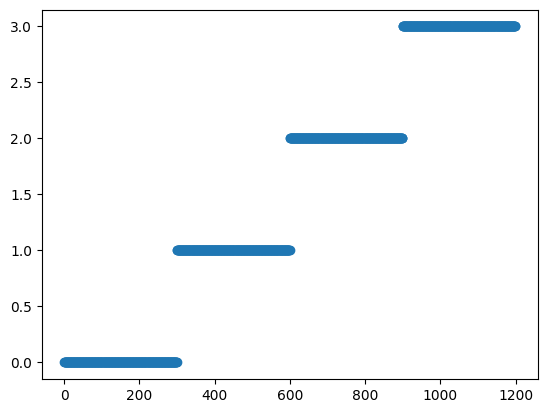

In [35]:
#Vamos a mostrar en un arreglo cómo se ve la distribución de los grupos
diag = pd.to_numeric(coraz_df2['Diagnostic'],errors='coerce')
diag=np.array(diag)
print(diag)

#Debido a la dimensionalidad del arreglo lo mejor es realizar una grafica
#Importamos matplotlib
import matplotlib.pyplot as plt
plt.scatter(range(len(coraz_df2['Diagnostic'])),coraz_df2['Diagnostic'])
plt.show()

In [36]:
#Quitar la columna de la clase (diagnostico)
coraz_df3 = coraz_df2.drop('Diagnostic', axis=1)

In [37]:
#Un ejercicio que podemos realizar es revisar cual es la mejor cantidad de grupos para el algortimo
from sklearn.cluster import KMeans
inercias = []
for i in range(1,10):
  Kmeans=KMeans(n_clusters=i,max_iter=300)
  Kmeans.fit(coraz_df3)
  inercias.append(Kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

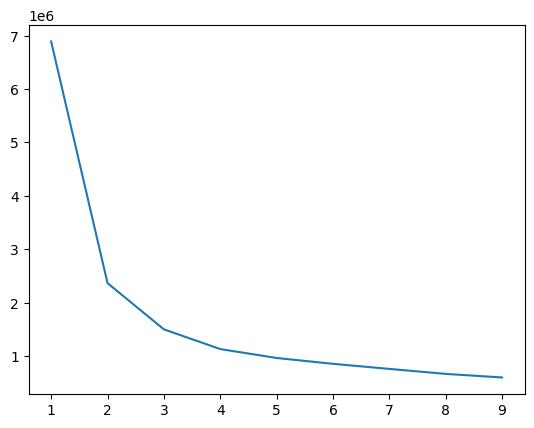

In [38]:
plt.plot(range(1,10),inercias)

In [39]:
#Ahora se aplicara el algortimo de K Medias para buscar los posibles grupos

#Se debe quitar la columna de salida porque se necesitan solo los datos de entrada
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=3,max_iter=300)
Kmeans.fit(coraz_df3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [40]:
#Ahora revisaremos los resultados
objetivos=Kmeans.fit_predict(coraz_df3)
print(objetivos)

#Debido a que los datos están ordenados podemos contrastar si el agrupamiento es parecido al real

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 2 ... 2 2 2]


In [41]:
#contar cuantos hay por grupo

#convertir arreglo en lista
objetivoslist = objetivos.tolist()
print("Del 0: ",objetivoslist.count(0))
print("Del 1: ",objetivoslist.count(1))
print("Del 2: ",objetivoslist.count(2))

Del 0:  347
Del 1:  180
Del 2:  673


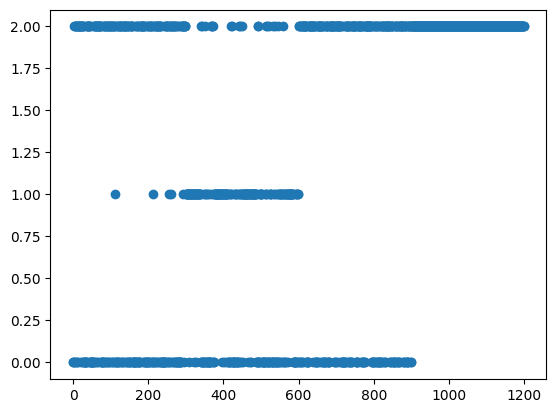

In [42]:
#Graficaremos el vector resultante
plt.scatter(range(len(coraz_df3['Pseg'])),objetivos)
plt.show()
plt.close()

In [43]:
#Vamos a ordenar y contar cuantos elementos hay en cada cluster
obje_ord=np.sort(objetivos)
print(obje_ord)

[0 0 0 ... 2 2 2]


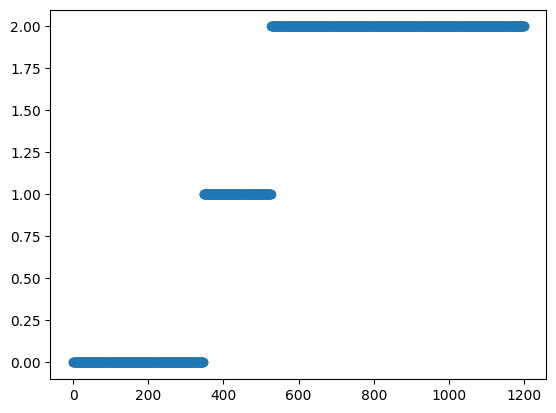

In [44]:
plt.scatter(range(len(obje_ord)),obje_ord)
plt.show()

[0 0 0 ... 3 3 3]


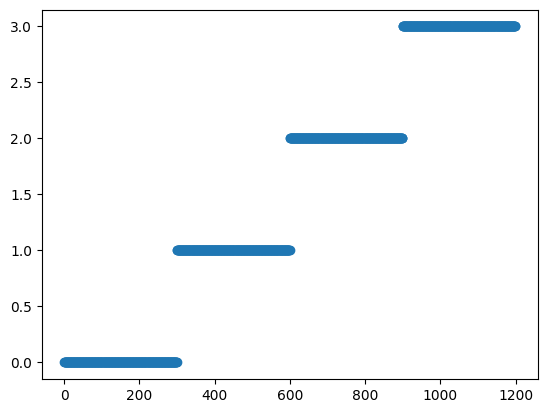

In [45]:
#Dataset original
#Vamos a mostrar en un arreglo cómo se ve la distribución de los grupos
diag = pd.to_numeric(coraz_df2['Diagnostic'],errors='coerce')
diag=np.array(diag)
print(diag)

#Debido a la dimensionalidad del arreglo lo mejor es realizar una grafica
#Importamos matplotlib
import matplotlib.pyplot as plt
plt.scatter(range(len(coraz_df2['Diagnostic'])),coraz_df2['Diagnostic'])
plt.show()

Para Kmedia tenemos que comparando el agrupamiento realizado por los clusters encuentra que se tienen 4 grupos de los cuales cada uno tiene 300 registros, para cada una de las anomalias presentadas como ARR (arritmia), AFF (fibrilación auricular), CHF (insuficiencia cardiaca congestiva) y NSR (ritmo sinusal normal).

En caso contrario el agrupamiento realizado por Kmeans nos proporciona una clasificación que lo hace de una manera especifica segun los datos, diferente de la clasificación original en donde solo manejaremos 3 clusters clasificados asi:
* Del 0:  347
* Del 1:  673
* Del 2:  180

Teniendo en cuenta que se estan tomando otras características en el agrupamiento. De tal manera que la clasificación de NSR (ritmo sinusal normal), la agrupa con CHF (insuficiencia cardiaca congestiva), ya que sus datos son más similares a este registro.
